In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf


Метод обратного распространения ошибки

Когда мы идем с начала до конечного слоя и получаем какуб-то метку класса или вещественное число это называется прямой проход(forward pass)

Затем идет обратный проход - от выходного значения до начального слоя тут у нас происходит подсчет градиентов, здесь и происходит изменение
весов и обучение нейронной сети и чтобы все происходило правильно и мы считали градиентв только по кускам а не всей сложной функции
для этого и есть метод обратного распространения ошибки(помогает обучать нейросеть легче)


правило цепочки - ... тут пиздец какой-то, но это типо высчитывание градиента от конца до начала и так типо легче получается высчитывать...

По этому правилу мы ищем градиенты у весов и смещений и изменяем их

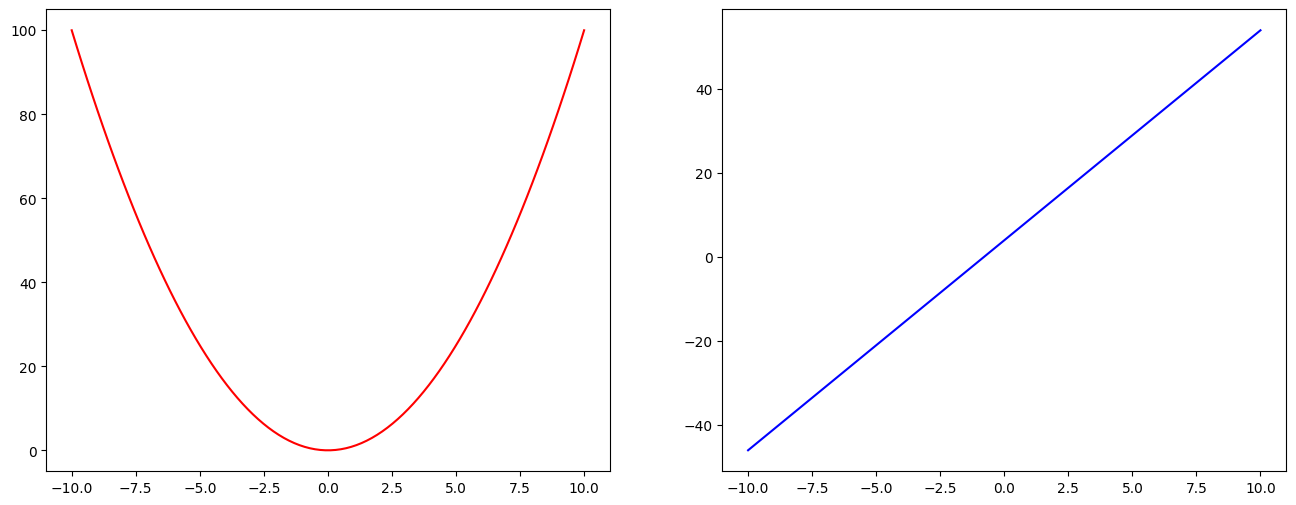

In [3]:
#правило цепочки

def f(x):
    return x**2

def g(x):
    return 4+5*x


fig,ax=plt.subplots(1,2,figsize=(16,6))
x=np.linspace(-10,10,100)
ax[0].plot(x,f(x),c='r')
ax[1].plot(x,g(x),c='b')



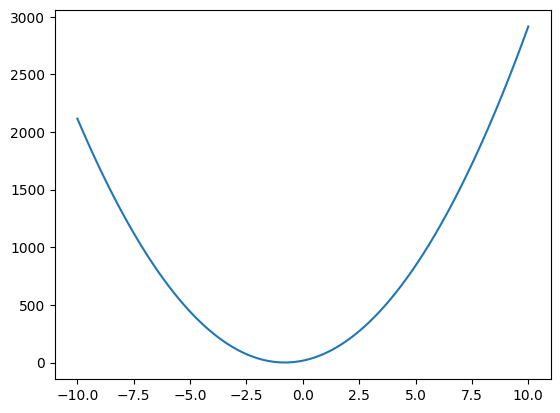

In [4]:
plt.plot(x,f(g(x))) #сложная функция которую будет решать по правилу цепочки

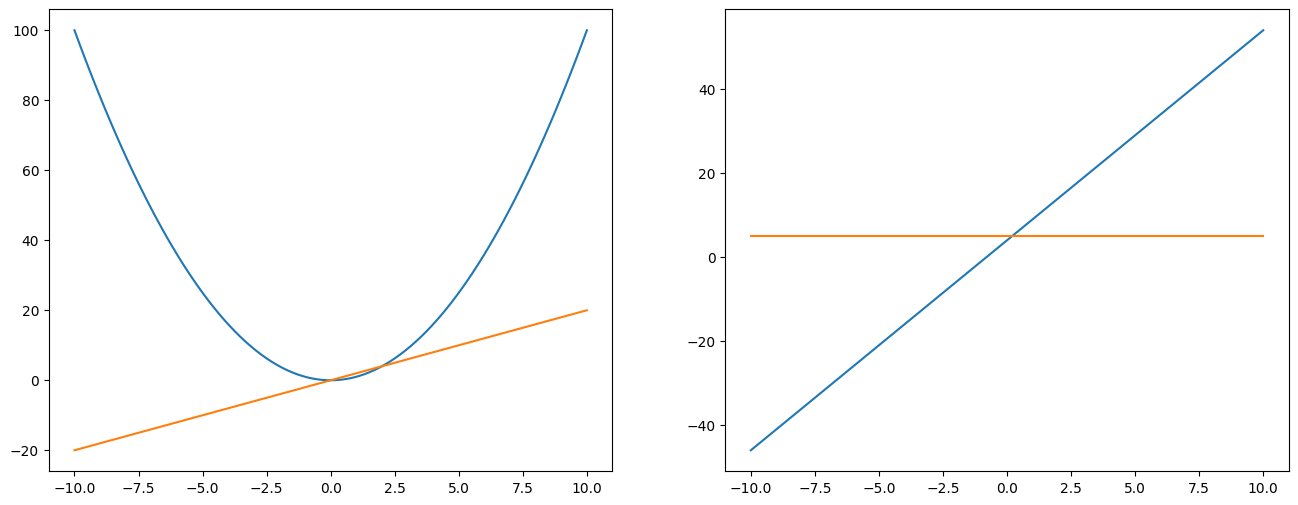

In [5]:
#производные
def deriv_f(x):
    return 2*x

def deriv_g(x):
    return np.ones_like(x) * 5 

fig,ax=plt.subplots(1,2,figsize=(16,6))

ax[0].plot(x,f(x))
ax[0].plot(x,deriv_f(x))
ax[1].plot(x,g(x))
ax[1].plot(x,deriv_g(x))


(-1.0, 100.0)

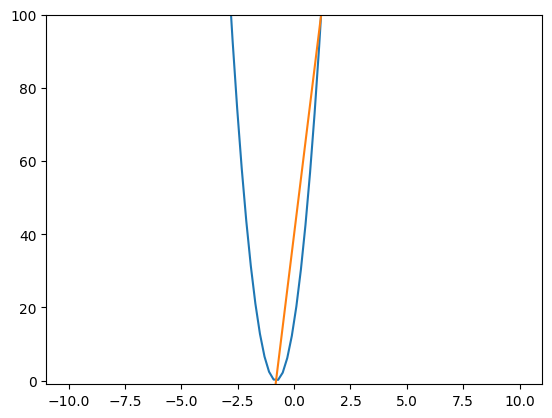

In [6]:
#теперь производная от сложной функции f(g(x))=(4+5x)^2
def derif_f_g(x):
    return 50*x+40
#можем брать эту производную также через вычислительный граф

plt.plot(x,f(g(x)))
plt.plot(x,derif_f_g(x))
plt.ylim(-1,100)

In [7]:
#короче здесь похуй

In [8]:
model=Sequential([
    Dense(1,input_shape=(1,),activation='sigmoid')
])

In [9]:
from keras.losses import MSE
from keras.optimizers import SGD

optimizer=SGD(learning_rate=1)
loss_fn=MSE

In [12]:
#детально изучаем метод обратного распространения ошибки


#зададим определенные параметры
params=[np.empty(shape=(1,1),dtype=np.float32),np.empty(shape=(1,),dtype=np.float32)]
params[0][0]=0.417
params[1][0]=0.72

model.set_weights(params)
model.get_weights()


[array([[0.417]], dtype=float32), array([0.72], dtype=float32)]